# Notebook Premise

## Notebook Premise: Medical Image Classification for Disease Diagnosis

**In this notebook, we aim to develop a deep learning model for the classification of medical images related to various musculoskeletal conditions. The dataset comprises images representing different types and stages of diseases such as Arthritis, Fracture, and Osteoarthritis.**

![/kaggle/input/knee-xray/C0075868-X-Rays_of_Normal_and_Degenerative_Knees.jpg](https://media.sciencephoto.com/image/c0075868/800wm/C0075868-X-Rays_of_Normal_and_Degenerative_Knees.jpg)

## Objectives

1. **Data Preparation:** Organize and preprocess the dataset, ensuring proper distribution among training, validation, and test sets. Implement data augmentation techniques to enhance model generalization.

2. **Model Selection:** Explore and compare the performance of popular pre-trained deep learning models, such as VGG16, ResNet50, and potentially YOLO for object detection. Assess their suitability for accurate classification of musculoskeletal conditions.

3. **Model Customization:** Fine-tune the selected pre-trained model to adapt it to the specific characteristics of the medical image dataset. Adjust input and output layers, freeze or modify pre-trained layers, and experiment with hyperparameters.

4. **Training and Evaluation:** Train the models on the training set, monitoring performance on the validation set to prevent overfitting. Evaluate the final models on an independent test set to assess their generalization capabilities.

**Throughout the notebook, we will provide explanations, code snippets, and visualizations to guide the reader through each step of the process. The ultimate goal is to develop a robust and accurate deep learning model capable of aiding in the automated diagnosis of musculoskeletal conditions based on medical images.**

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import LearningRateScheduler

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Preparation

In [4]:
xray = pd.read_csv('/content/drive/MyDrive/archive (13)/xray_knees.csv')

In [5]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
# Generate data batches
batch_size = 32

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (13)/files',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 50 images belonging to 6 classes.


In [7]:
xray.nunique()

dcm     50
jpg     50
type     6
dtype: int64

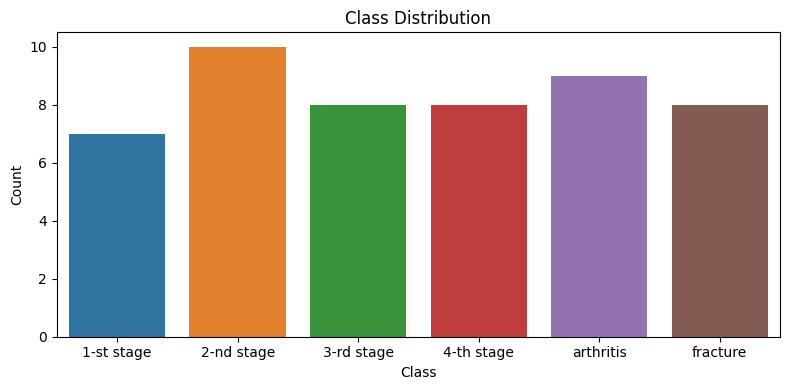

In [8]:
# Plot: Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=xray)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

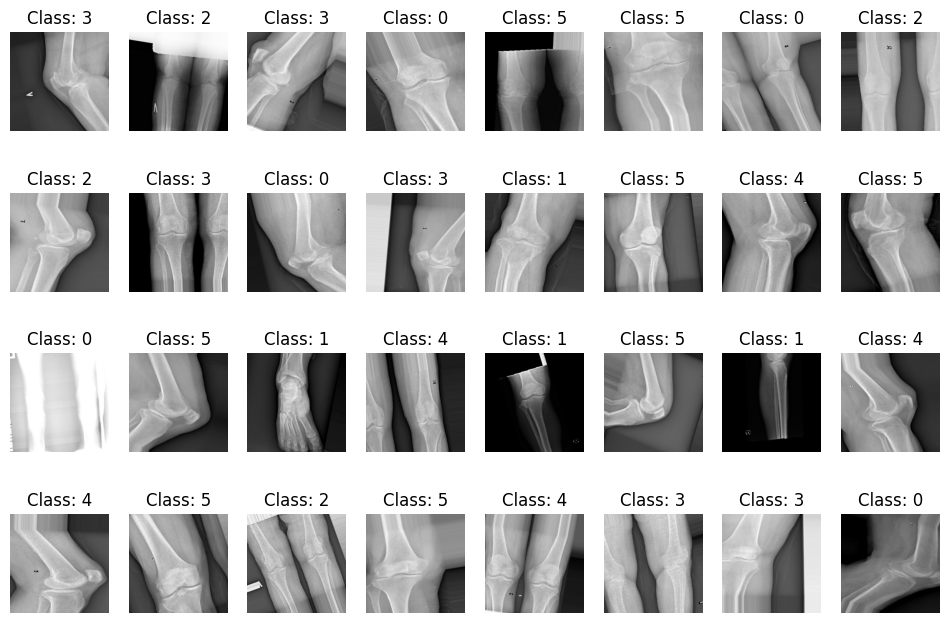

In [9]:
images, labels = train_generator.next()

# Display the images
plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i])
    plt.title(f'Class: {np.argmax(labels[i])}')
    plt.axis('off')

plt.show()

# Model Building and Training

In [10]:
def schedule(epoch, lr):
    if epoch < 10:
        return 0.001
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(schedule)

## My Custom Cnn model

1. **Starting Point:**
   - I designed a Convolutional Neural Network (CNN) to work with images sized (224, 224, 3).

2. **First Convolutional Layer:**
   - It has 32 filters, each (3, 3) in size, using ReLU activation.
   - This layer learns basic features from the input images.

3. **First Max-Pooling Layer:**
   - A (2, 2) window is used to reduce spatial dimensions.

4. **Second Convolutional Layer:**
   - Now, 64 filters (3, 3) in size with ReLU activation.
   - It dives deeper, capturing more complex features.

5. **Second Max-Pooling Layer:**
   - Further reduction in spatial dimensions.

6. **Third Convolutional Layer:**
   - Introducing 128 filters (3, 3) with ReLU activation.
   - This layer captures intricate patterns.

7. **Third Max-Pooling Layer:**
   - Further reduction in spatial dimensions.

8. **Flatten Layer:**
   - Transforming the 3D output to a 1D array for the fully connected layers.

9. **First Fully Connected Layer:**
   - 512 neurons with ReLU activation.
   - Learns high-level features.

10. **Dropout Layer:**
    - Randomly drops 50% of connections, preventing overfitting.

11. **Second Fully Connected Layer:**
    - The final layer with 6 neurons and softmax activation.
    - Produces probabilities for the 6 specified classes.

In summary, I crafted a neural network that processes input images through convolutional and max-pooling layers, extracts features in fully connected layers, and utilizes dropout for regularization. The last layer offers probabilities for the 6 specified classes.

In [12]:
mymodel = Sequential()
mymodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(64, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Conv2D(128, (3, 3), activation='relu'))
mymodel.add(MaxPooling2D((2, 2)))
mymodel.add(Flatten())
mymodel.add(Dense(512, activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(6, activation='softmax'))  # 6 classes

In [13]:
mymodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = mymodel.fit(train_generator, epochs=8, callbacks=[lr_scheduler])

Epoch 1/8
2/2 [==============================] - 25s 889ms/step - loss: 1.7220 - accuracy: 0.2000 - lr: 0.0010
Epoch 2/8
2/2 [==============================] - 2s 1s/step - loss: 0.7724 - accuracy: 0.1000 - lr: 0.0010
Epoch 3/8
2/2 [==============================] - 2s 1s/step - loss: 0.5456 - accuracy: 0.1600 - lr: 0.0010
Epoch 4/8
2/2 [==============================] - 2s 1s/step - loss: 0.5128 - accuracy: 0.1000 - lr: 0.0010
Epoch 5/8
2/2 [==============================] - 3s 2s/step - loss: 0.4948 - accuracy: 0.1200 - lr: 0.0010
Epoch 6/8
2/2 [==============================] - 2s 1s/step - loss: 0.4656 - accuracy: 0.2400 - lr: 0.0010
Epoch 7/8
2/2 [==============================] - 2s 563ms/step - loss: 0.4773 - accuracy: 0.1800 - lr: 0.0010
Epoch 8/8
2/2 [==============================] - 2s 1s/step - loss: 0.4651 - accuracy: 0.1800 - lr: 0.0010


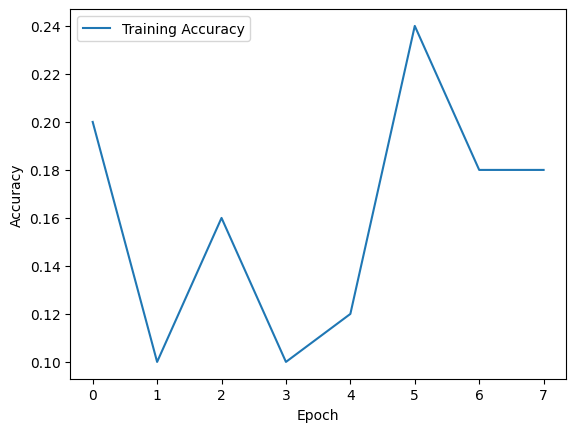

In [15]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

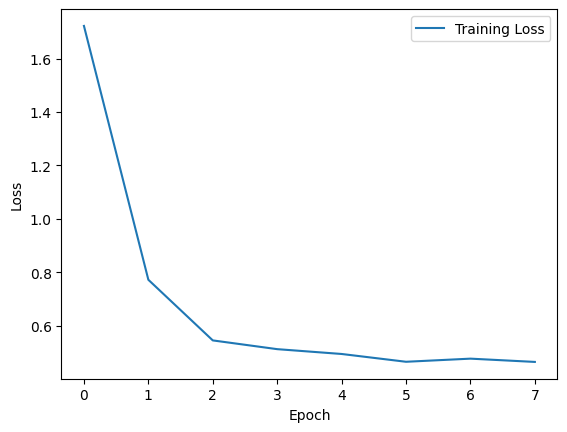

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## VGG

**VGG, which stands for Visual Geometry Group, is a series of models designed for image classification. Specifically, VGG16 is one of its versions with 16 layers. In my code, I'm using VGG16 as a pre-trained model. By freezing its layers, I retain its learned features and build a custom model on top for my specific classification task. This allows me to leverage the pre-trained knowledge of VGG16 for better performance.**

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
vggmodel = models.Sequential()
vggmodel.add(base_model)
vggmodel.add(layers.Flatten())
vggmodel.add(layers.Dense(512, activation='relu'))
vggmodel.add(layers.Dropout(0.5))
vggmodel.add(layers.Dense(6, activation='softmax'))

In [19]:
vggmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = vggmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 8s 2s/step - loss: 1.2528 - accuracy: 0.1600 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 2s 564ms/step - loss: 1.9196 - accuracy: 0.2400 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 3s 975ms/step - loss: 1.1683 - accuracy: 0.2000 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 2s 617ms/step - loss: 0.9563 - accuracy: 0.2000 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 2s 682ms/step - loss: 0.8666 - accuracy: 0.2600 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 2s 603ms/step - loss: 0.9910 - accuracy: 0.2600 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 2s 640ms/step - loss: 0.8443 - accuracy: 0.2800 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 4s 918ms/step - loss: 0.8079 - accuracy: 0.2600 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 3s 1s/step - loss: 0.6479 - accuracy: 0.3800 - lr: 0.0010
Epoch 1

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## ResNet50

**ResNet, short for Residual Networks, is a family of models designed for image classification. ResNet50, one of its versions with 50 layers, is utilized in my code. By adopting ResNet50 as a pre-trained model, I harness its powerful capability to learn intricate features from diverse datasets. Freezing its layers ensures the preservation of these learned features while I construct a tailored model for my specific classification task. This strategy enables me to benefit from the pre-trained knowledge of ResNet50, enhancing the performance of my model.**

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
rsmodel = models.Sequential()
rsmodel.add(base_model)
rsmodel.add(layers.GlobalAveragePooling2D())
rsmodel.add(layers.Dense(512, activation='relu'))
rsmodel.add(layers.Dropout(0.5))
rsmodel.add(layers.Dense(6, activation='softmax'))

In [ ]:
rsmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = rsmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## DenseNet121

**DenseNet, or Densely Connected Convolutional Networks, is another family of models for image classification. In my code, I've chosen DenseNet121, a specific version with 121 layers. By incorporating DenseNet121 as a pre-trained model, I capitalize on its ability to capture dense connections between layers, promoting feature reuse. Freezing its layers preserves these learned features as I build my customized model for a specific classification task. This approach allows me to leverage the pre-trained knowledge of DenseNet121, improving the overall performance of my model.**


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
dnmodel = Sequential()
dnmodel.add(base_model)
dnmodel.add(GlobalAveragePooling2D())
dnmodel.add(Dense(512, activation='relu'))
dnmodel.add(Dropout(0.5))
dnmodel.add(Dense(6, activation='sigmoid'))

In [ ]:
dnmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = dnmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## EfficientNetB0

**EfficientNet is a family of models designed for efficient image classification. EfficientNetB0 is the baseline version with optimal performance and computational efficiency. In my code, I'm using EfficientNetB0 as a pre-trained model to take advantage of its well-balanced architecture. By freezing its layers, I maintain the knowledge it gained during pre-training while constructing a model tailored to my specific 6-class classification task. This approach enables me to leverage the pre-trained knowledge of EfficientNetB0, enhancing the efficiency and effectiveness of my model.**

In [21]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [22]:
enmodel = Sequential()
enmodel.add(base_model)
enmodel.add(GlobalAveragePooling2D())
enmodel.add(Dense(512, activation='relu'))
enmodel.add(Dropout(0.5))
enmodel.add(Dense(1, activation='sigmoid'))

In [23]:
enmodel.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = enmodel.fit(train_generator, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
2/2 [==============================] - 10s 284ms/step - loss: 0.5695 - accuracy: 0.7933 - lr: 0.0010
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.5439 - accuracy: 0.8333 - lr: 0.0010
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.4877 - accuracy: 0.8333 - lr: 0.0010
Epoch 4/50
2/2 [==============================] - 2s 947ms/step - loss: 0.4625 - accuracy: 0.8333 - lr: 0.0010
Epoch 5/50
2/2 [==============================] - 3s 803ms/step - loss: 0.4881 - accuracy: 0.8333 - lr: 0.0010
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 0.4575 - accuracy: 0.8333 - lr: 0.0010
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 0.4650 - accuracy: 0.8333 - lr: 0.0010
Epoch 8/50
2/2 [==============================] - 2s 627ms/step - loss: 0.4647 - accuracy: 0.8333 - lr: 0.0010
Epoch 9/50
2/2 [==============================] - 2s 1s/step - loss: 0.4583 - accuracy: 0.8333 - lr: 0.0010
Epoch 10/50
2/2

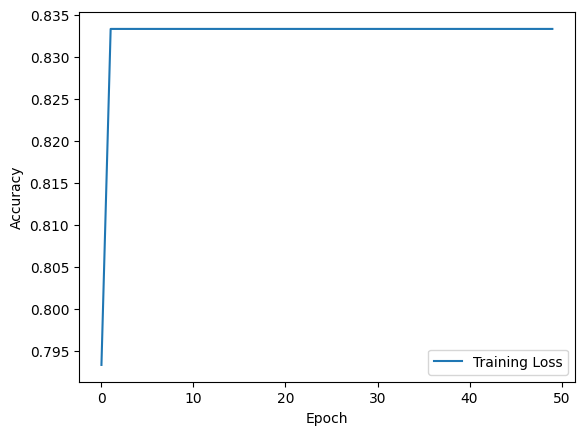

In [25]:
plt.plot(history.history['accuracy'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

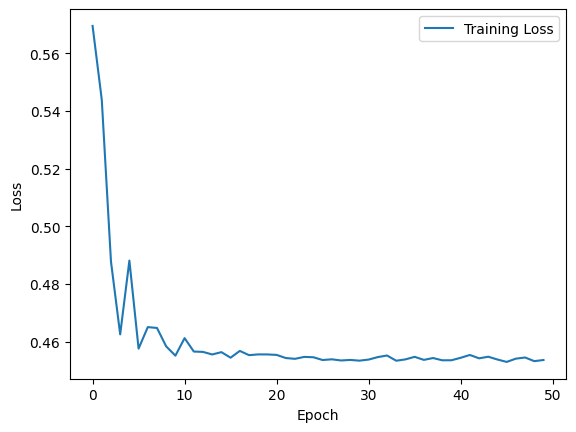

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion

### In summary, this notebook delves into using powerful pre-trained models (VGG16, ResNet50, DenseNet121, EfficientNetB5) for image classification.